# Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras

# Importing datasets

In [2]:
train_dir = r'E:\Python\Projects\Face Mask Detection System\dataset\train' 
validation_dir = r'E:\Python\Projects\Face Mask Detection System\dataset\validation'
test_dir = r'E:\Python\Projects\Face Mask Detection System\dataset\test'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size =(150,150),
    batch_size = 20,
    class_mode = 'binary')

#batch size give same number of image every time to generator

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

# Creating model

In [6]:
model = models.Sequential() 

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape =(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
from tensorflow.keras import optimizers

In [9]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

# Fitting the model 

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs= 20,
    validation_data = validation_generator,
    validation_steps = 50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 0.3620 - acc: 0.8275

D:\Program Files\Anaconda3\envs\tf\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 [==============================] - 32s 325ms/step - loss: 0.3620 - acc: 0.8275 - val_loss: 0.2770 - val_acc: 0.8890
Epoch 2/20
100/100 [==============================] - 33s 327ms/step - loss: 0.1176 - acc: 0.9565 - val_loss: 0.4606 - val_acc: 0.8230
Epoch 3/20
100/100 [==============================] - 33s 327ms/step - loss: 0.0861 - acc: 0.9705 - val_loss: 0.7235 - val_acc: 0.7810
Epoch 4/20
100/100 [==============================] - 33s 327ms/step - loss: 0.0719 - acc: 0.9755 - val_loss: 0.5453 - val_acc: 0.8250
Epoch 5/20
100/100 [==============================] - 34s 335ms/step - loss: 0.0689 - acc: 0.9785 - val_loss: 1.8448 - val_acc: 0.7450
Epoch 6/20
100/100 [==============================] - 33s 328ms/step - loss: 0.0560 - acc: 0.9830 - val_loss: 1.1812 - val_acc: 0.7730
Epoch 7/20
100/100 [==============================] - 33s 329ms/step - loss: 0.0477 - acc: 0.9840 - val_loss: 1.6551 - val_acc: 0.7740
Epoch 8/20
100/100 [==============================] - 33s 328ms/st

# Training loss and accuracy plot

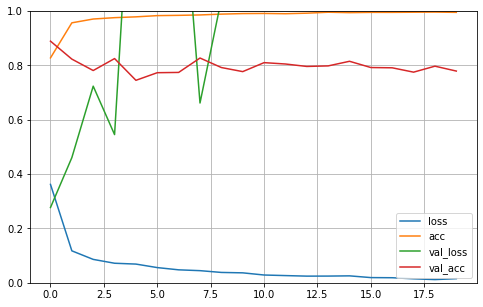

In [11]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size =(150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


# Evaluating model

In [13]:
model.evaluate_generator(test_generator, steps =50 )

Instructions for updating:
Please use Model.evaluate, which supports generators.


D:\Program Files\Anaconda3\envs\tf\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[3.711902379989624, 0.6230000257492065]